
Quick Looks at the Data - TXS 0506+056
==========================
Let's look at a "[famous](https://www.science.org/content/article/ghostly-particle-caught-polar-ice-ushers-new-way-look-universe)" source in a more complicated region: TXS 0506+056. 

These are quick ways you can have a look at your data. These give you some insight, but they are not statistically rigorous (rigor needs the Likelihood method).  The data you are about to see have not been corrected for things like livetime, exposure, background, random acts of statistics etc.  but go for it…

*Goals: make simple views of the data*

In [1]:
#from IPython.display import Image,HTML

In [2]:
from astropy.io import fits as pyfits

In [4]:
%matplotlib inline

In [5]:
import gt_apps

In [6]:
from gt_apps import filter,maketime,counts_map

### Download data from the LAT Data Server

You'll need to create a directory to store the data we are going to use, and then download that data. 

Below are the inputs that you will need to enter into the [LAT Data Server](https://fermi.gsfc.nasa.gov/cgi-bin/ssc/LAT/LATDataQuery.cgi).

In [2]:
# Make the data directory, if it doesn't already exist.
!mkdir ../0506data/

In [7]:
# Download your data and put it in the directory you just made. You will have to do this step by hand.

In [7]:
# Put your data in the the directory you just made. 
!ls ../0506data/*PH*fits > ../0506data/events.txt
!cat ../0506data/events.txt

../0506data/L2205271519455687423901_PH00.fits
../0506data/L2205271519455687423901_PH01.fits
../0506data/L2205271519455687423901_PH02.fits


In [8]:
# I like to rename the spacecraft file to something like "SC.fits" to make it easier to work with.
!mv ../0506data/*SC*.fits ../0506data/SC.fits

mv: '../0506data/SC.fits' and '../0506data/SC.fits' are the same file


### Using gtbin to make a counts map

*[gtbin](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtbin.txt)* is a pretty versitle tool: It can make:
* counts maps (counts_map + CMAP)
* healpix maps (counts_map + HEALPIX)
* counts cubes (counts_map + CCUBE)
* simple light curves (evtbin + LC)
* simple spectra (evtbin + PHA1/PHA2)

We're going to make a counts map and plot it with python.  You can also use [ds9](http://hea-www.harvard.edu/RD/ds9/site/Home.html) or fv to plot this.

This will make an image 200x200 pixels, where each pixel is 0.05 deg. on a side. Image will be 10 deg. on a side.

In [9]:
filter['infile'] = '@../0506data/events.txt'
filter['outfile'] = '../0506data/0506_filt.fits'
filter['ra'] = 77.3582
filter['dec'] = 5.69315
filter['rad'] = 15.0
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 100
filter['emax'] = 300000
filter['zmax'] = 90
filter['evclass'] = 128
filter['evtype'] = 3
filter.run()

time -p gtselect infile=@../0506data/events.txt outfile=../0506data/0506_filt.fits ra=77.3582 dec=5.69315 rad=15.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 7.99
user 1.98
sys 1.18


In [10]:
maketime['evfile'] = '../0506data/0506_filt.fits'
maketime['outfile'] = '../0506data/0506_filt_gti.fits'
maketime['scfile'] = '../0506data/SC.fits'
maketime['filter'] = 'DATA_QUAL>0 && LAT_CONFIG==1'
maketime['apply_filter'] = 'yes'
maketime['roicut'] = 'no'
maketime.run()

time -p gtmktime scfile=../0506data/SC.fits sctable="SC_DATA" filter="DATA_QUAL>0 && LAT_CONFIG==1" roicut=no evfile=../0506data/0506_filt.fits evtable="EVENTS" outfile="../0506data/0506_filt_gti.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 6.49
user 2.70
sys 0.78


In [11]:
from gt_apps import counts_map
counts_map['evfile'] = '../0506data/0506_filt_gti.fits'
counts_map['scfile'] = 'NONE'
counts_map['outfile'] = '../0506data/0506_cmap2.fits'
counts_map['algorithm'] = 'CMAP'
counts_map['xref'] = 77.3582
counts_map['yref'] = 5.69315
counts_map['coordsys'] = 'CEL'
counts_map['nxpix'] = 200
counts_map['nypix'] = 200
counts_map['binsz'] = 0.05
counts_map['axisrot'] = 0.0
counts_map['proj'] = 'AIT'
counts_map.run()

time -p gtbin evfile=../0506data/0506_filt_gti.fits scfile=NONE outfile=../0506data/0506_cmap2.fits algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=200 nypix=200 binsz=0.05 coordsys="CEL" xref=77.3582 yref=5.69315 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
gtbin: WARNING: No spacecraft file: EXPOSURE keyword will be set equal to ontime.
real 0.53
user 0.27
sys 0.04


In [12]:
cmap = pyfits.open('../0506data/0506_cmap2.fits')

In [13]:
cmap.info()

Filename: ../0506data/0506_cmap2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     128   (200, 200)   int32   
  1  GTI           1 BinTableHDU     48   5644R x 2C   [D, D]   


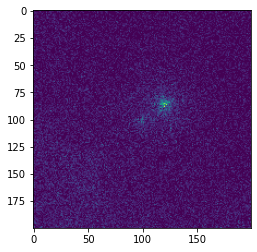

In [14]:
imshow(cmap[0].data)

In the image above we can see the target source in the center, as well as a second, brighter source to the northwest. That's another blazar called PKS 0502+049 and we'll explore the implications of its presence below.

Note that I'm not using any packages to figure out the World Coordinate System (WCS) of this image so the X and Y are just pixel coordinates.  I could use ds9, fv or aplpy to get proper RA/DEC on this.  But you can immediately see the ROI cut we made, TXS 0506+056 at the center and the other two to five background sources in the field of view.  It'll take a likelihood analysis to wrangle out all of the relevant details about these sources…that's for tomorrow.


In [15]:
!ds9 ../0506data/0506_cmap2.fits

## Make some lightcurves.
We can use gtselect to make a really tight selection around TXS 0506+056. And since it's so bright we can assume that what we're looking at is almost entirely due to the photons from the AGN. 

### One lightcurve for TXS 0506+056

In [16]:
filter['infile'] = '../0506data/0506_filt_gti.fits'
filter['outfile'] = '../0506data/0506_1deg.fits'
filter['ra'] = 77.3582
filter['dec'] = 5.69315
filter['rad'] = 1.0
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 100
filter['emax'] = 300000
filter['zmax'] = 90
filter['evclass'] = 128
filter['evtype'] = 3
filter.run()

time -p gtselect infile=../0506data/0506_filt_gti.fits outfile=../0506data/0506_1deg.fits ra=77.3582 dec=5.69315 rad=1.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.73
user 0.40
sys 0.34


### And another for PKS 0502+049

In [17]:
filter['infile'] = '../0506data/0506_filt_gti.fits'
filter['outfile'] = '../0506data/0502_1deg.fits'
filter['ra'] = 76.346603
filter['dec'] = 4.995201
filter['rad'] = 1.0
filter['tmin'] = 'INDEF'
filter['tmax'] = 'INDEF'
filter['emin'] = 100
filter['emax'] = 300000
filter['zmax'] = 90
filter['evclass'] = 128
filter['evtype'] = 3
filter.run()

time -p gtselect infile=../0506data/0506_filt_gti.fits outfile=../0506data/0502_1deg.fits ra=76.346603 dec=4.995201 rad=1.0 tmin="INDEF" tmax="INDEF" emin=100.0 emax=300000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 0.71
user 0.45
sys 0.28


In [18]:
lc_gtselect = pyfits.open('../0506data/0506_1deg.fits')

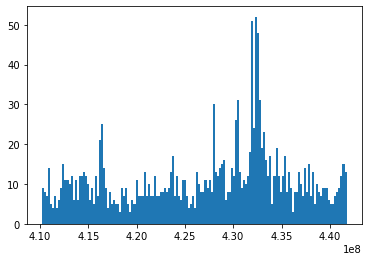

In [19]:
# This is the lightcurve for TXS 0506+056
n, bins, patches = hist(lc_gtselect[1].data.field('TIME'), bins=150)

In [20]:
lc2_gtselect = pyfits.open('../0506data/0502_1deg.fits')

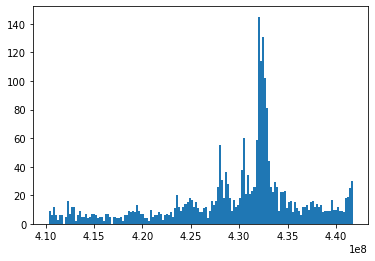

In [21]:
# This is the ligthcurve for PKS 0502+049
n, bins, patches = hist(lc2_gtselect[1].data.field('TIME'), bins=150)

Hmm, these lightcurves look quite similar! It seems that the signal of the field source ~1 deg. away (PKS 0502+049) is driving the bulk of the variability "observed" for the target (TXS 0506+056). This is why you should do a Likelihood analysis!

### Using gtbin to make a light curve

It looks a bit weird using a histogram to make a light curve.  We can use *gtbin* to make a more 'sciency' light curve with errors and everything.  We should probably first run gtmktime to update the GTIs of the file we just made.

In [22]:
from gt_apps import maketime, evtbin

In [23]:
maketime['scfile'] = '../0506data/SC.fits' # the SpaceCraft file
maketime['filter'] = "(DATA_QUAL==1)&&(LAT_CONFIG==1)"
maketime['roicut'] = 'yes'
maketime['evfile'] = '../0506data/0506_1deg.fits' # output from gtselect
maketime['outfile'] = '../0506data/0506_1deg_gti.fits'

In [24]:
maketime.run()

time -p gtmktime scfile=../0506data/SC.fits sctable="SC_DATA" filter="(DATA_QUAL==1)&&(LAT_CONFIG==1)" roicut=yes evfile=../0506data/0506_1deg.fits evtable="EVENTS" outfile="../0506data/0506_1deg_gti.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 4.54
user 3.92
sys 0.49


In [25]:
evtbin['algorithm'] = 'LC' # "LC" = "light curve"
evtbin['outfile'] = '../0506data/0506_1deg_lc.fits' 
evtbin['evfile'] = '../0506data/0506_1deg_gti.fits' # output from gtmaktime (previous step)
evtbin['scfile'] = '../0506data/SC.fits'
evtbin['tbinalg'] = 'LIN' # use a linear binning algorithm
evtbin['tstart'] = 410227203
evtbin['tstop'] = 441763203
evtbin['dtime'] = 2.5*86400

In [26]:
evtbin.run()

time -p gtbin evfile=../0506data/0506_1deg_gti.fits scfile=../0506data/SC.fits outfile=../0506data/0506_1deg_lc.fits algorithm="LC" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tstart=410227203.0 tstop=441763203.0 dtime=216000.0 tbinfile=NONE coordsys="CEL" axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
real 1.01
user 0.58
sys 0.19


In [27]:
lc_gtbin = pyfits.open('../0506data/0506_1deg_lc.fits')

<ErrorbarContainer object of 3 artists>

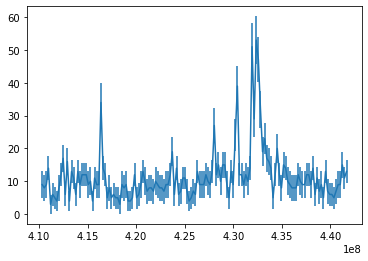

In [28]:
errorbar(lc_gtbin[1].data.field('TIME'),lc_gtbin[1].data.field('Counts'),yerr=lc_gtbin[1].data.field('Error'))

That looks better. We should again note that we haven't made any corrections for "contamination" of the source by counts from bright field sources. You can certainly use aperture photometry as a quick-look method to see if something interesting *might* be going on with a source, but getting realistic results will require the rigor of a likelihood analysis meethod.

### Other views of the data
Of course, we can't go over all of the ways you can quickly look at the data here are some others (and links to examples):

* [Aperture photometry](http://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/aperture_photometry.html)
    * R. Corbet of the FSSC also generates [Light curves for all of the 3FGL sources](http://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/ap_lcs.php).
* Exposure corrected light curves.
* Looking for clusters of photons.
* And lots more...
